In [1]:
import pandas as pd

In [2]:
import seaborn as sns
from scipy import stats
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt 

##  to select the best features that explain my target variable 
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:

def get_outliers(df, variable):
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)

    IQR = Q3 - Q1

    # Identify outliers
    outliers = df[(df[variable] < (Q1 - 1.5 * IQR)) |  (df[variable] > (Q3 + 1.5 * IQR))]
    return outliers 


In [4]:
df_ms = pd.read_csv('/Users/janet.xuishi/Downloads/Integrated _CA1_Mushrooms Datasource.csv', na_values = '?')

In [5]:
df_ms.isnull().sum()

Mushroom ID                 122
Cap Shape                   116
Cap Color                   105
Gill Size                    93
Stalk Shape                 101
Habitat                     104
Edibility                   113
Market Demand               107
Spore Print Color           111
Population                  105
Odor                        107
Bruising                    100
Ring Type                    89
Stalk Surface Above Ring     99
Stalk Surface Below Ring    103
Stalk Color Above Ring      104
Stalk Color Below Ring      107
Veil Type                    94
Veil Color                   94
Growth Rate                  81
Inspection Date               0
Incubation date               0
Temperature                   0
Measurement                   0
dtype: int64

In [6]:
df_ms_tr = df_ms.copy()
#df_ms_tr['Growth Rate'] = df_ms_tr[df_ms_tr['Growth Rate'] < 6]
df_ms_tr.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Mushroom ID               878 non-null    float64
 1   Cap Shape                 884 non-null    object 
 2   Cap Color                 895 non-null    object 
 3   Gill Size                 907 non-null    object 
 4   Stalk Shape               899 non-null    object 
 5   Habitat                   896 non-null    object 
 6   Edibility                 887 non-null    object 
 7   Market Demand             893 non-null    float64
 8   Spore Print Color         889 non-null    object 
 9   Population                895 non-null    object 
 10  Odor                      893 non-null    object 
 11  Bruising                  900 non-null    object 
 12  Ring Type                 911 non-null    object 
 13  Stalk Surface Above Ring  901 non-null    object 
 14  Stalk Sur

In [7]:
df_ms_tr['Mushroom ID'].fillna(method='bfill', inplace=True)

/var/folders/m4/d1bsxckd7y52_7b_g5_dnvbm0000gn/T/ipykernel_34479/455430886.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ms_tr['Mushroom ID'].fillna(method='bfill', inplace=True)


In [8]:

# Get column names of categorical variables
cat_columns = df_ms_tr.select_dtypes(include=['object']).columns.tolist()

# Get column names with missing data (NaN) among categorical variables
cat_columns_nan = [col for col in cat_columns if df_ms_tr[col].isnull().any()]
cat_columns_nan

['Cap Shape',
 'Cap Color',
 'Gill Size',
 'Stalk Shape',
 'Habitat',
 'Edibility',
 'Spore Print Color',
 'Population',
 'Odor',
 'Bruising',
 'Ring Type',
 'Stalk Surface Above Ring',
 'Stalk Surface Below Ring',
 'Stalk Color Above Ring',
 'Stalk Color Below Ring',
 'Veil Type',
 'Veil Color']

In [9]:
for col in cat_columns_nan:
    imputer = SimpleImputer(strategy='constant', fill_value='MISSING')
# Fit the imputer on the data
imputer.fit(df_ms_tr[cat_columns_nan])

df_ms_tr[cat_columns_nan] = imputer.transform(df_ms_tr[cat_columns_nan])



In [10]:
#imputer = SimpleImputer(strategy='constant', fill_value= 0)
#imputer.fit(df_ms_tr[['Market Demand']])
#df_ms_tr[['Market Demand']] = imputer.transform(df_ms_tr[['Market Demand']])


imputer = SimpleImputer(strategy='mean')
imputer.fit(df_ms_tr[['Market Demand']])
df_ms_tr[['Market Demand']] = imputer.transform(df_ms_tr[['Market Demand']])


In [11]:
pd.crosstab(df_ms_tr['Market Demand'],df_ms_tr['Population'],margins=True)

Population,MISSING,abundant,numerous,scattered,several,solitary,All
Market Demand,,,,,,,
1.0,9,18,21,15,12,10,85
2.0,8,15,23,16,15,16,93
3.0,11,15,21,24,21,17,109
4.0,10,16,20,16,17,14,93
5.0,5,10,19,20,13,13,80
5.387458006718925,16,19,20,17,22,13,107
6.0,5,24,15,16,12,20,92
7.0,14,24,16,15,11,12,92
8.0,8,24,19,14,13,7,85


In [12]:
### before encoding we need to explore outliers 

df_ms_out = df_ms_tr.copy()

#check_outliers = ['Growth Rate','Temperature']

#for col in check_outliers:
#    outliers = get_outliers(df_ms_out,col)
#    ### remove all outliers - temporarily.. just for initial analsys
#    df_ms_out = df_ms_out[~df_ms_out['Mushroom ID'].isin(outliers['Mushroom ID'])]


In [13]:
df_ms_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Mushroom ID               1000 non-null   float64
 1   Cap Shape                 1000 non-null   object 
 2   Cap Color                 1000 non-null   object 
 3   Gill Size                 1000 non-null   object 
 4   Stalk Shape               1000 non-null   object 
 5   Habitat                   1000 non-null   object 
 6   Edibility                 1000 non-null   object 
 7   Market Demand             1000 non-null   float64
 8   Spore Print Color         1000 non-null   object 
 9   Population                1000 non-null   object 
 10  Odor                      1000 non-null   object 
 11  Bruising                  1000 non-null   object 
 12  Ring Type                 1000 non-null   object 
 13  Stalk Surface Above Ring  1000 non-null   object 
 14  Stalk Sur

In [14]:
imputer = SimpleImputer(strategy='median')
imputer.fit(df_ms_out[['Growth Rate']])
df_ms_out[['Growth Rate']] = imputer.transform(df_ms_out[['Growth Rate']])


In [15]:
label_encoder = LabelEncoder()

for col in df_ms_out.select_dtypes(include=['object']).columns:
    df_ms_out[col] = label_encoder.fit_transform(df_ms_out[col]) 

In [16]:
df_ms_out['Growth Rate'].describe()

count    1000.000000
mean        2.864018
std         1.707359
min         0.502267
25%         1.773095
50%         2.726681
75%         3.746824
max        21.511763
Name: Growth Rate, dtype: float64

In [17]:
#call the library SelectKBest, and passing 'all' since we want to submit all my categories to this selection 
ModelSelect = SelectKBest(score_func=f_classif,k='all')

In [18]:
#call the library SelectKBest, and passing 'all' since we want to submit all my categories to this selection 
ModelSelect = SelectKBest(score_func=f_classif,k='all')

In [19]:
fit=ModelSelect.fit(df_ms_out,df_ms_out['Market Demand'])

In [20]:
filter = ModelSelect.get_support(indices=True)

In [21]:
filter

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [22]:
### restore the name of the columns according to the filter position of the column... 
features_selected = df_ms_out.iloc[:,filter]

In [23]:
### get all the scores for each columns that contributed to the customer satisfaction 
feature_scores = fit.scores_

/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/janet.xuishi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Score')

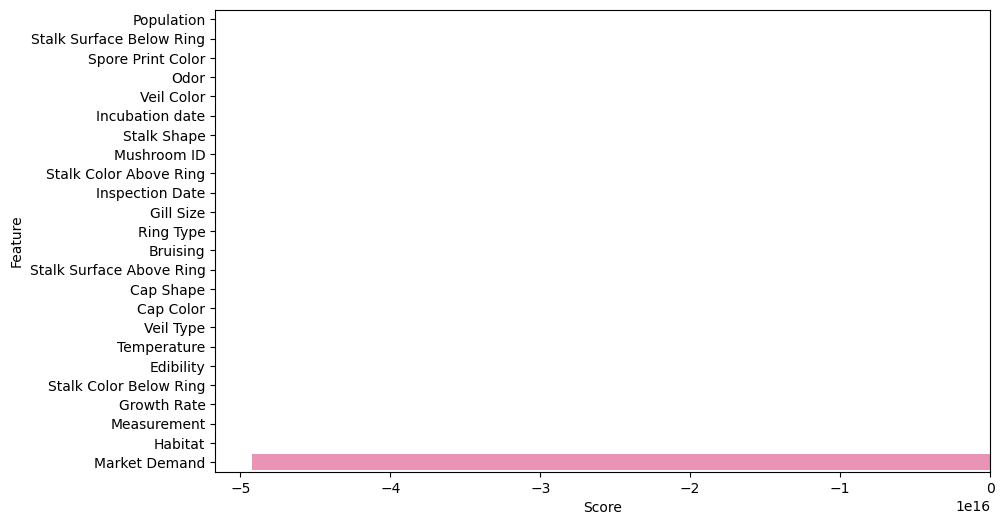

In [24]:
### by creating a data frame with feature selected and feature_scores.. and plot into a barplot graph... 
df_scores = pd.DataFrame({'Feature': features_selected.columns, 'Score': feature_scores})
df_scores =df_scores.sort_values(by = 'Score', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=df_scores)
plt.xlabel('Score')